# Demo of Data I/O for Fragility Epilepsy Using EZTrack EDP

Adam Li

1/10/19: Here, I want to demonstrate how to load in data based on a directory of either raw data, or computed results at the i) center ii) patient and iii) dataset level.

I will extract out the data, and then display.

In [1]:
import os
import sys
import numpy as np

%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

sys.path.append("../../")
from edp.loaders.centerdata import CenterLoader
from edp.loaders.patient.subjectresultsloader import SubjectResultsLoader
from edp.loaders.dataset.result.resultloader import ResultLoader

# Import magic commands for jupyter notebook 
%load_ext autoreload
%autoreload 2

# Set Data Directories

Note here that resultsdir is somehow organized, but it doesn't have to be as long as the datafiles are within resultsdir/

In [2]:
center = 'cleveland'
reference = 'common_avg'
modality = 'scalp'

DATADIR = 'D:\Documents\Hopkins\Research\NeuromedicalControlSystemsLab\IntersessionProject\eztrackv2\edp\utils\Data'
resultsdir = os.path.join(DATADIR, 
                          center)

# Load in Data
- Center
- Patient
- Dataset

In [3]:
#la08 - no scalp data
#la09 - error in contact data
#la14 - no contact data
allpats = ['la04', 'la05','la06', 'la07', 'la10', 'la11', 'la15']

### Center

In [4]:
centerloader = CenterLoader(centername=center, 
                            subjids=allpats,
                            preload=True,
                            datatype='freq',
                            root_dir=resultsdir)

print("Finished loading in data for this center for {}".format(allpats))

Already renamed seeg.xyz
Already renamed gain.mat
Already renamed seeg.xyz
Already renamed gain.mat
Found 6 jsonfilepaths for la04
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_1p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_2p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_3p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_4p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab

In [5]:
print("These are all the datasets: \n", centerloader.get_results())

('These are all the datasets: \n', array([ <edp.base.objects.dataset.result_object.FreqModelResult object at 0x0000000004136898>,
       <edp.base.objects.dataset.result_object.FreqModelResult object at 0x000000000D57C048>], dtype=object))


### Patient

In [6]:
patientloader = SubjectResultsLoader(subjid=allpats[0],
                            preload=True,
                            datatype='freq',
                            root_dir=resultsdir)

print("Finished loading in data for this patient")

Already renamed seeg.xyz
Already renamed gain.mat
Found 6 jsonfilepaths for la04
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_1p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_2p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_3p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_4p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data

In [7]:
print("These are all the datasets: \n", patientloader.get_results())

('These are all the datasets: \n', [<edp.base.objects.dataset.result_object.FreqModelResult object at 0x000000000465DD68>, <edp.base.objects.dataset.result_object.FreqModelResult object at 0x0000000004665908>, <edp.base.objects.dataset.result_object.FreqModelResult object at 0x0000000004665C50>, <edp.base.objects.dataset.result_object.FreqModelResult object at 0x000000000D57C4A8>, <edp.base.objects.dataset.result_object.FreqModelResult object at 0x000000000D57C550>, <edp.base.objects.dataset.result_object.FreqModelResult object at 0x000000000D57C5F8>])


### Dataset

In [8]:
datasetloader = ResultLoader(jsonfilepath=os.path.join(resultsdir, 'la04_scalp_sz_6p_freq.json'),
                            preload=True,
                            datatype='freq',
                            results_dir=resultsdir)

print("Finished loading in data for this patient")

('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_6p_freqmodel.npz')
Finished loading in data for this patient


In [9]:
print("These are all the datasets: \n", datasetloader.result)

('These are all the datasets: \n', <edp.base.objects.dataset.result_object.FreqModelResult object at 0x000000000465D9E8>)


# 2. Using the Data

Note that the datasets are organized in python classes, so each result loaded is a list of these FragilityModelResult classes. See /edp/base/objects/dataset/result_object.py

This class helps user to extract out metadata and reformat data correctly.

Note for scalp data, cezinds returns an empty list, while for ieeg, cezlobeinds will return an empty list.

In [10]:
exdataset = centerloader.get_results()[0]
print(exdataset)

# compute how to separate channels into their lobes
exdataset.compute_montage_groups()

la04 scalp_sz_1p Frequency Power Model (39L, 501L, 143L)


In [11]:
# get the fragility matrix
freqmat = exdataset.get_data()

# get the corresponding channels labels
chanlabels = exdataset.chanlabels

# get ieeg ez
cezcontacts = exdataset.cezcontacts

# get lobe
cezlobe = exdataset.cezlobe

# get indices of ieeg cez
ieegcezinds = exdataset.cezinds
cezinds = exdataset.cezlobeinds

print(freqmat.shape, len(chanlabels))

print(cezcontacts, cezlobe, ieegcezinds, cezinds)
for i in exdataset.ch_groups:
    print(i)
print(exdataset.ch_groups['right-occipital'])

((39L, 501L, 143L), 39)
([], [u'left-frontal', u'left-temporal'], [], [0, 2, 10, 25, 19, 21, 24, 26])
right-occipital
right-frontal
right-parietal
left-frontal
left-parietal
left-occipital
right-temporal
left-temporal
[7, 9, 15, 18, 20]


In [169]:
#################################################################
# Parameters

allpats = ['la04', 'la05','la06', 'la07', 'la10', 'la11', 'la15']
windowstart = 10
windowend = 25
floor = 0
power = 3 #increases high's and decreases lows. Should be odd.
myband = 'delta'
baselinePrecursor = 20. #seconds
normalizeHemis = False

################################################################
# Helper functions

def getBaselineMat(result, data, precursor):
    onsetwin = result.onsetwin
    samplerate = result.samplerate
    winsize = result.winsize
    stepsize = result.stepsize          
    # back-compute in seconds what a window is
    winsize_secs = winsize / float(samplerate)      
    baselinewin = onsetwin - (baselinePrecursor / winsize_secs)      
    # trim CxFxT in time to the baseline
    baselinemat = data[:, :,:baselinewin]
    return baselinemat

def normalize(data, baselineMat):
    normalized = np.copy(data)
    for i in np.arange(np.size(data, 0)):
        for j in np.arange(np.size(data, 1)):
            normalized[i, j, :] = (normalized[i, j, :] - np.median(baselineMat[i, j, :]))/np.std(baselineMat[i, j, :])
    return normalized

def removeFloor(data, floor = 0):
    posData = np.copy(data)
    posData[posData < floor] = .0000000001
    return posData
    
def chooseBand(result, normalizedData, band = 'gamma'):
    deltamax = 3
    thetamax = 7.5
    alphamax = 13
    betamax = 30
    gammamax = 100
    freqs = result.get_metadata()['freqs']
    if (band == 'delta'):
        return normalizedData[:, freqs < deltamax, :]
    elif (band == 'theta'):
        return normalizedData[:,np.all([freqs < thetamax, freqs > deltamax], 0), :]
    elif (band == 'alpha'):
        return normalizedData[:, np.all([freqs < alphamax , freqs > thetamax], 0), :]
    elif (band == 'beta'):
        return normalizedData[:, np.all([freqs < betamax , freqs > alphamax], 0), :]
    else:
        return normalizedData[:, freqs > betamax, :]

def chooseWindow(freqMatrix, start = 0, end = -1):
    return freqMatrix[:, start:end]

def getLobe(result, windowedMat, lobe):
    return windowedMat[result.ch_groups[lobe], :]

def getLobeValues(result, windowedMat):
            lf = getLobe(result, windowedMat, 'left-frontal')
            lp = getLobe(result, windowedMat, 'left-parietal')
            lo = getLobe(result, windowedMat, 'left-occipital')
            lt = getLobe(result, windowedMat, 'left-temporal')
            rt = getLobe(result, windowedMat, 'right-temporal')
            ro = getLobe(result, windowedMat, 'right-occipital')
            rp = getLobe(result, windowedMat, 'right-parietal')
            rf = getLobe(result, windowedMat, 'right-frontal')
            matList = [lf, lp, lo, lt, rt, ro, rp, rf]
            return matList

###########################################################################
# Main Functions

def getFreqDistribution(patientIndex):
        patientloader = SubjectResultsLoader(subjid=allpats[patientIndex],
                            preload=True,
                            datatype='freq',
                            root_dir=resultsdir);
        TotalLobeFreq = np.zeros(8)
        dataCount = 0
        for result in patientloader.get_results():
            result.compute_montage_groups()
            data = np.power(10, result.get_data()) #C x F x T
            bm = getBaselineMat(result,data, baselinePrecursor)  #C x F x (T0)
            normalizedData = normalize(data, bm) #C x F x T
            bandMat = chooseBand(result, normalizedData, myband) #C x Fi x T
            bandAvg = np.median(bandMat, 1) #C x 1 x T
            windowedMat = chooseWindow(bandAvg, windowstart, windowend) # C x 1 x Tw
            lobeList = getLobeValues(result, windowedMat) # (c1 to c8) x 1 x Tw
            for i in np.arange(len(lobeList)):
                lobeList[i] = removeFloor(lobeList[i])
                lobeList[i] = np.power(lobeList[i], power)
            
            for i in np.arange(len(lobeList)):
                AvgFreq = np.mean(lobeList[i])                #mean across times and channels
                TotalLobeFreq[i] = TotalLobeFreq[i] + AvgFreq
            dataCount += 1
        AvgLobeFreq = TotalLobeFreq/dataCount
        AvgLobeFreq = AvgLobeFreq/np.sum(AvgLobeFreq)
        return AvgLobeFreq, patientloader

            

def getPatientContacts(patientIndex):
    contactfile = '../../edp/utils/Results/' + allpats[patientIndex] + 'contactDistribution.npy'
    return np.load(contactfile)
    

In [31]:
print(getFreqDistribution(1)[0])

Already renamed seeg.xyz
Already renamed gain.mat
Found 6 jsonfilepaths for la05
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la05_scalp_sz_1p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la05_scalp_sz_2p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la05_scalp_sz_3a_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la05_scalp_sz_4a_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data

In [155]:
from scipy import stats
from scipy.spatial import distance

LobeNames = ['lf', 'lp', 'lo', 'lt', 'rt', 'ro', 'rp', 'rf']
def plotFreqVsContacts(patIndex):
    cDist = getPatientContacts(patIndex)
    cDist = cDist/np.sum(cDist)
    fDist, patient = getFreqDistribution(patIndex)
    
    # Plotting
    N = 8      
    ind = np.arange(N)  # the x locations for the groups
    width = 0.3       # the width of the bars
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, cDist, width, color='r')
    rects2 = ax.bar(ind+width, fDist, width, color='g')
    ax.set_ylabel('Lobe')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(LobeNames)
    ax.set_ylim((0, .5))
    ax.legend( (rects1[0], rects2[0]), ('contacts', 'freq') )
    if (patient.get_results()[0].get_metadata()['outcome'] == 's'):
        ax.set_title("Success: " + allpats[patIndex])
    else:
        ax.set_title("Failure: " + allpats[patIndex])

LobeLeft = ['lf', 'lp', 'lo', 'lt']
LobeRight = ['rt', 'ro', 'rp', 'rf']

#True if freq suggests we should choose left hemisphere
def pickLeftHemisphere(fDist):
    return np.sum(fDist[:4]) > np.sum(fDist[4:])

def plotHemisphereDistribution(patIndex, normalize = True):
    fDist, patient = getFreqDistribution(patIndex)
    cDist = getPatientContacts(patIndex)
    cDist = cDist/np.sum(cDist)
    if (pickLeftHemisphere(fDist)):
        f = fDist[:4]
        c = cDist[:4]
        lobes = LobeLeft
    else:
        f = fDist[4:]
        c = cDist[4:]
        lobes = LobeRight
    if normalize:
        f = f/np.sum(f)
        c = c/np.sum(c)
    
    print(np.sum(f))
    
    # Plotting
    N = 4      
    ind = np.arange(N)  # the x locations for the groups
    width = 0.3       # the width of the bars
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, c, width, color='r')
    rects2 = ax.bar(ind+width, f, width, color='g')
    ax.set_ylabel('Lobe')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(lobes)
    ax.set_ylim((0, .8))
    ax.legend( (rects1[0], rects2[0]), ('contacts', 'freq') )
    if (patient.get_results()[0].get_metadata()['outcome'] == 's'):
        ax.set_title("Success: " + allpats[patIndex])
    else:
        ax.set_title("Failure: " + allpats[patIndex])


def calcMetrics(allpats, oneHemi = False, normalize = True):
    ks_2samp = []
    k1_div = []
    euc = []
    l1 = []
    mins = []
    minsSqrd = []
    sqrtDist = []
    success = []
    EMD = []
    for i in np.arange(len(allpats)):
        fDist, patient = getFreqDistribution(i)
        cDist = getPatientContacts(i)
        cDist = cDist/np.sum(cDist)
        if (oneHemi):
            if (pickLeftHemisphere(fDist)):
                f = fDist[:4]
                c = cDist[:4]
                lobes = LobeLeft
            else:
                f = fDist[4:]
                c = cDist[4:]
                lobes = LobeRight
            if normalize:
                fDist = f/np.sum(f)
                cDist = c/np.sum(c)
            else:
                fDist = f
                cDist = c
        
        ks_2samp.append(stats.ks_2samp(cDist, fDist)[0])
        k1_div.append(stats.entropy(cDist,fDist))
        euc.append(distance.euclidean(cDist, fDist))
        l1.append(np.sum(np.abs(cDist - fDist)))
        mins.append(np.sum(np.minimum(cDist, fDist)))
        minsSqrd.append(np.sum(np.power(np.minimum(cDist, fDist), 2)))
        sqrtDist.append(np.sum(np.sqrt(np.abs(cDist-fDist))))
        EMD.append(stats.wasserstein_distance(cDist, fDist))
        success.append(patient.get_results()[0].get_metadata()['outcome'])
    myStats = {
        "KS_2sample": ks_2samp,
        "KL_div": k1_div,
        "Euclidean_Distance": euc,
        "L1_Norm": l1,
        "Intersection": mins,
        "Squared_Intersection":minsSqrd,
        "Sqrt_Distance":sqrtDist,
        "outcome": success,
        "EMD": EMD
    }
    return myStats
            
            
    

Already renamed seeg.xyz
Already renamed gain.mat
Found 6 jsonfilepaths for la04
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_1p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_2p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_3p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_4p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data

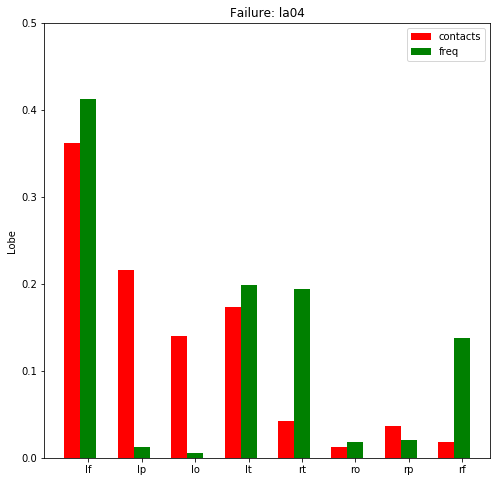

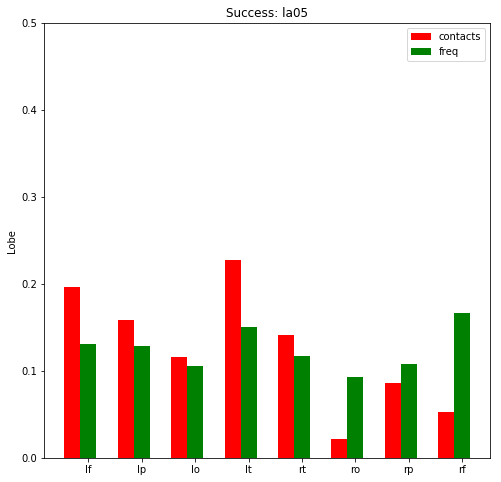

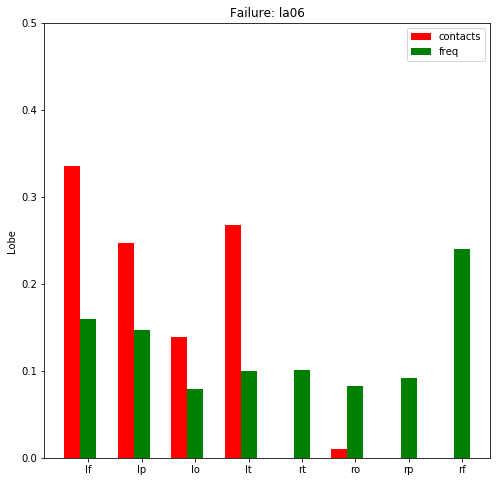

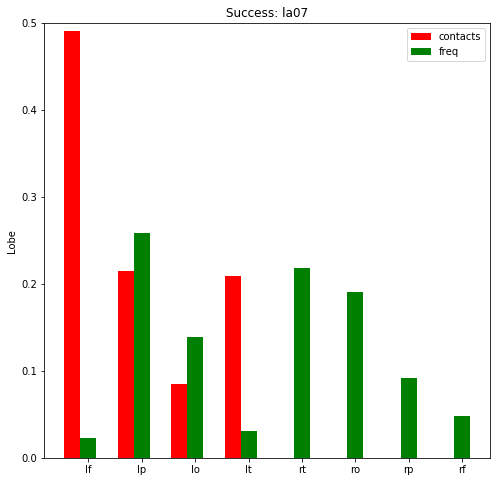

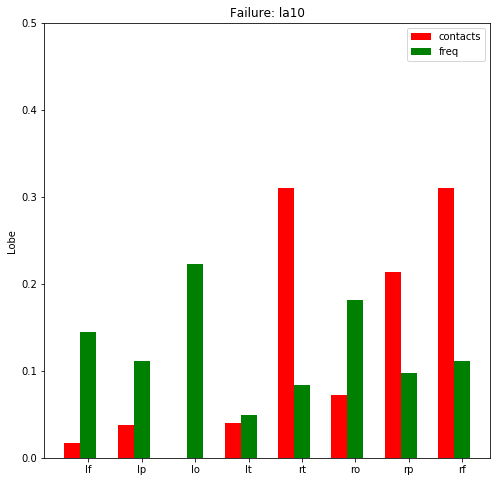

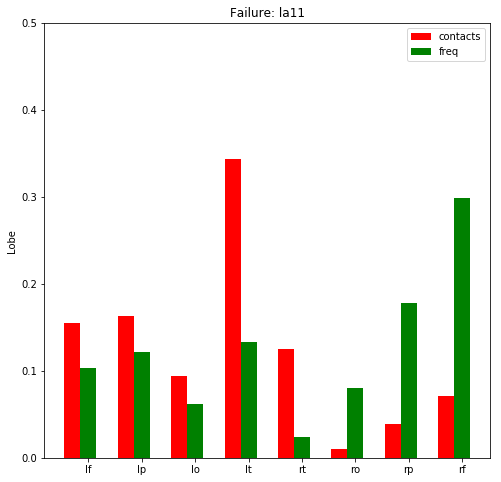

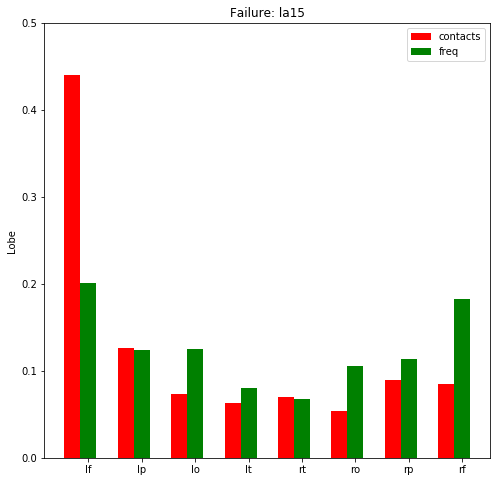

In [84]:
for i in np.arange(len(allpats)):
    plotFreqVsContacts(i)

Already renamed seeg.xyz
Already renamed gain.mat
Found 6 jsonfilepaths for la04
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_1p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_2p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_3p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_4p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data

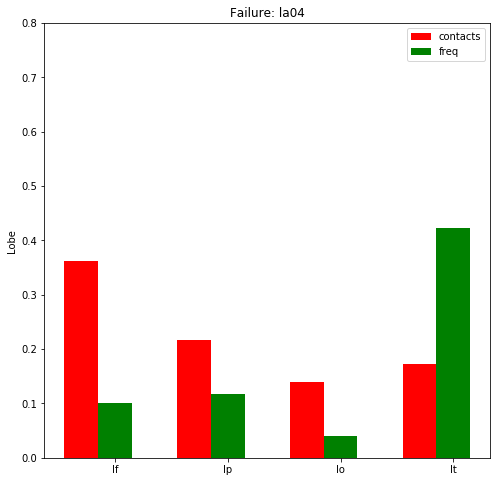

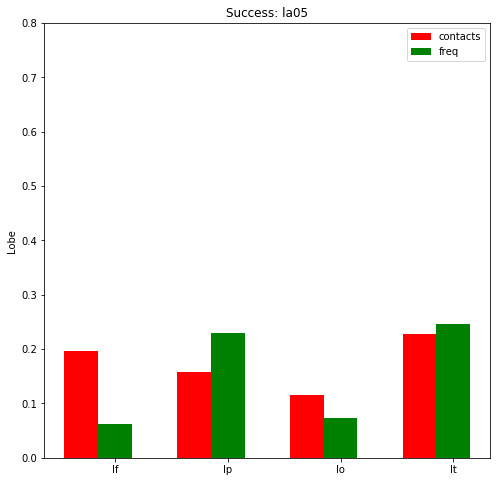

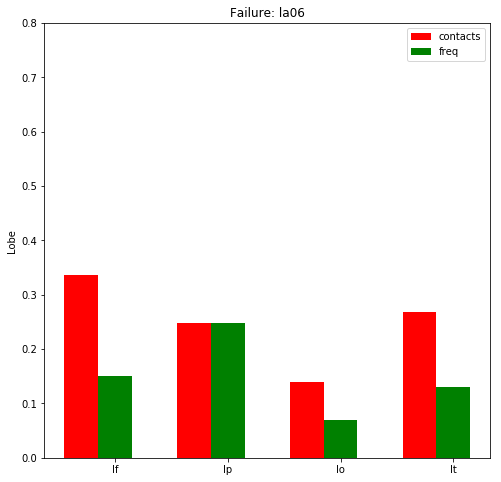

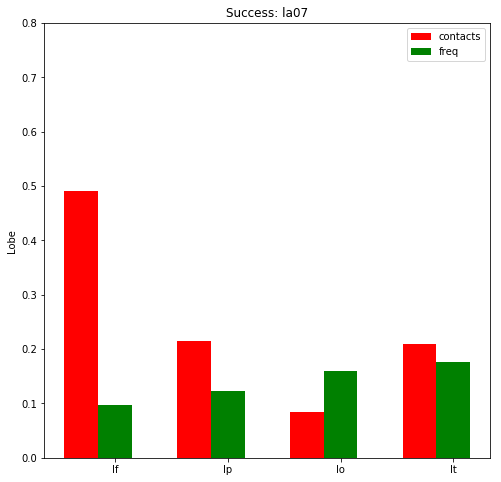

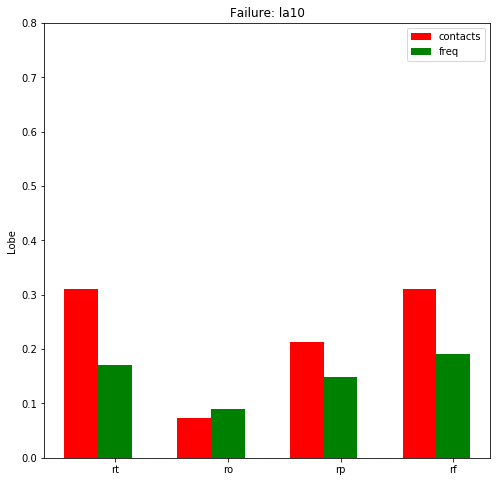

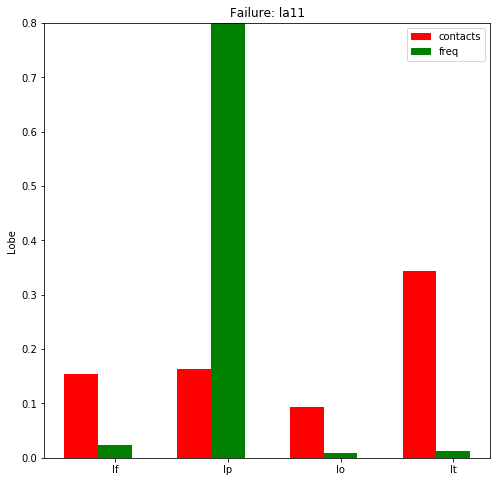

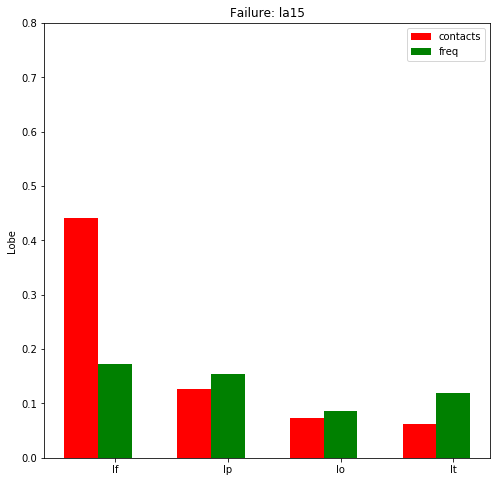

In [82]:
for i in np.arange(len(allpats)):
    plotHemisphereDistribution(i, normalizeHemis)

In [60]:
metrics = calcMetrics(allpats)

Already renamed seeg.xyz
Already renamed gain.mat
Found 8 jsonfilepaths for la03
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la03_scalp_sz_1a_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la03_scalp_sz_2e_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la03_scalp_sz_3e_-_4p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la03_scalp_sz_5a_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\

('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la15_scalp_sz_8p_freqmodel.npz')


In [105]:
print(metrics.keys())

['KS_2sample', 'outcome', 'Euclidean_Distance', 'KL_div', 'Squared_Intersection', 'Sqrt_Distance', 'Intersection', 'L1_Norm']


In [190]:
%%capture
#All in one place settings/ computation
allpats = ['la04', 'la05','la06', 'la07', 'la10', 'la11','la12', 'la15'] #which patients to test
windowstart = 5 #how many points prior to onset to use
windowend = 15 #how many points ahead from onset to use
floor = 0 #What number to zero. at least zero to remove negative numbers
power = 1 #increases high's and decreases lows. Should be odd, 1 if no use
myband = 'gamma' #which freq band to use
baselinePrecursor = 10. # seconds prior to onset to consider baseline
metrics = calcMetrics(allpats, False, False)  
#for i in np.arange(len(allpats)):
#   plotFreqVsContacts(i)


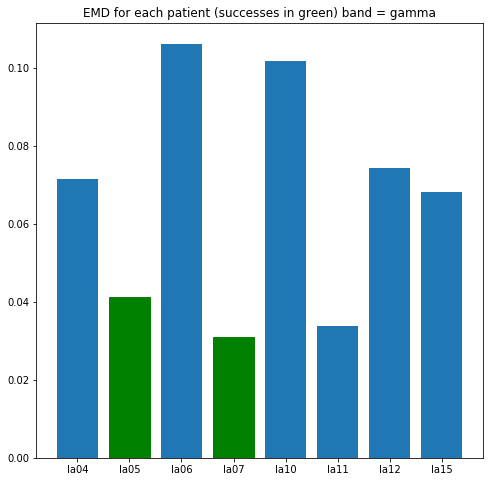

In [191]:
myMetric = 'EMD' #Which distance metric to use
#Plotting results from above
plt.figure(figsize = (8,8))
graph = plt.bar(allpats, metrics[myMetric])
plt.title(myMetric + " for each patient (successes in green) band = " + myband)
for i in np.arange(len(graph)):
    if metrics['outcome'][i] == 's':
        graph[i].set_color('g')

# -----------------------------------------------------------------------------------------------------------

# OLD STUFF BELOW


In [12]:
#helper function
#returns a certain band of the freq matrix
def getBand(mat, band2, freqs):
    deltamax = 3
    thetamax = 7.5
    alphamax = 13
    betamax = 30
    gammamax = 100
    if (band2 == 'delta'):
        return mat[:, freqs < deltamax, :]
    elif (band2 == 'theta'):
        return mat[:,np.all([freqs < thetamax, freqs > deltamax], 0), :]
    elif (band2 == 'alpha'):
        return mat[:, np.all([freqs < alphamax , freqs > thetamax], 0), :]
    elif (band2 == 'beta'):
        return mat[:, np.all([freqs < betamax , freqs > alphamax], 0), :]
    else:
        return mat[:, freqs > betamax, :]

#helper function
#determines avg value of freq data for given lobe/freq band
def calcLobeFreq(pat, start = 0, stop = -1, band1 = 'gamma', floor = 0):
    pat.compute_montage_groups()
    freqs = pat.get_metadata()['freqs']
    freqmat = np.median(np.power(10, getBand(pat.get_data(), band1 , freqs)), 1)#get median matrix for all channels for given frequency band
    start = np.max([0, start])
    stop = np.min([stop, np.size(freqmat, 1)])
    freqmat2 = np.copy(freqmat)
    for i in np.arange(np.size(freqmat, 0)):
        #freqmat2[i, :] = np.power((freqmat2[i, :] - np.min(freqmat2[i, :]))/ (np.max(freqmat2[i, :] - np.min(freqmat2[i, :]))), 1)
        freqmat2[i, :] = (freqmat2[i, :] - np.median(freqmat2[i, :]))/np.std(freqmat2[i, :])
    freqmat2 = np.power(freqmat2, 5)
    freqmat2[freqmat2 < floor] = .000001
    freqmat2 = np.sqrt(freqmat2)
    toPlot = np.copy(freqmat2)
    #freqmat2[freqmat2 >= floor] = 1

    ro = freqmat2[pat.ch_groups['right-occipital'], start:stop]
    lo = freqmat2[pat.ch_groups['left-occipital'], start:stop]
    rf = freqmat2[pat.ch_groups['right-frontal'], start:stop]
    lf = freqmat2[pat.ch_groups['left-frontal'], start:stop]
    rp = freqmat2[pat.ch_groups['right-parietal'], start:stop]
    lp = freqmat2[pat.ch_groups['left-parietal'], start:stop]
    rt = freqmat2[pat.ch_groups['right-temporal'], start:stop]
    lt = freqmat2[pat.ch_groups['left-temporal'], start:stop]

    matList = [lf, lp, lo, lt, rt, ro, rp, rf]
    
    avgSignals = []
    for i in matList:
        avgSignals.append(np.mean(i, axis = 0))
    avgLobeFreq = []
    for i in avgSignals:
        avgLobeFreq.append(np.median(i))
    return avgSignals, avgLobeFreq, toPlot

#call this function
#myband options: 'gamma' 'delta' 'alpha' 'beta' 'theta'
def calcFreqDistribution(timeWindow, plot = False, floor = 0, myband = 'gamma'):
    totFreq = np.zeros((8, 1))
    count = 0
    for pat in patientloader.get_results():
        
        onset = pat.get_metadata()['onsetwin']
        upper = onset + 3* timeWindow
        lower = onset - timeWindow
        
        # here we will trim the data if we so choose
        if TRIM_DATA:
            onsetwin = pat.onsetwin
            samplerate = pat.samplerate
            winsize = pat.winsize
            stepsize = pat.stepsize
            
            # back-compute in seconds what a window is
            winsize_secs = winsize / float(samplerate)
            
            baselinewin = onsetwin - (10. / winsize_secs)
            
            # trim CxFxT in time to the baseline
            baselinemat = pat.get_data()[...,:baselinewin]
        
        dataSignals, dataAvg, toPlot = calcLobeFreq(pat, lower, upper, band1 = myband)
        count += 1
        for i in np.arange(len(dataAvg)):
            totFreq[i, 0] += dataAvg[i]
        

    avgFreq = []
    for i in np.arange(len(totFreq)):
        avgFreq.append(totFreq[i,0]/count)
   
    FreqDist = np.array(avgFreq)
    FreqDist = avgFreq/(np.sum(avgFreq))
    if not plot:
        return FreqDist
    
    plt.figure(figsize=(5,5))
    FreqNames = ['lf', 'lp', 'lo', 'lt', 'rt', 'ro', 'rp', 'rf']
    plt.bar(FreqNames, FreqDist)
    plt.title("Avg Freq of lobes, window: " + str(timeWindow))
    return FreqDist

        
    

[u'datasetname', u'reference', u'bad_channels', u'resultfilename', u'onsetwin', u'clinical_difficulty', u'clinical_match', u'non_eeg_channels', u'dataset_id', u'patient_id', u'modality', u'samplerate', u'chanlabels', u'rawfilename', u'meas_date', u'clinical_center', u'cezlobe', u'note', u'onsetind', u'onsetsec', u'numwins', u'type', u'ablated_contacts', u'offsetsec', u'offsetwin', u'offsetind', u'stepsize', u'resected_contacts', u'samplepoints', u'linefreq', u'number_chans', u'onset_age', u'montage', u'freqs', u'engel_score', u'psdtype', u'lowpass_freq', u'age_surgery', u'outcome', u'winsize', u'highpass_freq']
200.0
Already renamed seeg.xyz
Already renamed gain.mat
Found 6 jsonfilepaths for la10
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la10_scalp_7p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\Inter

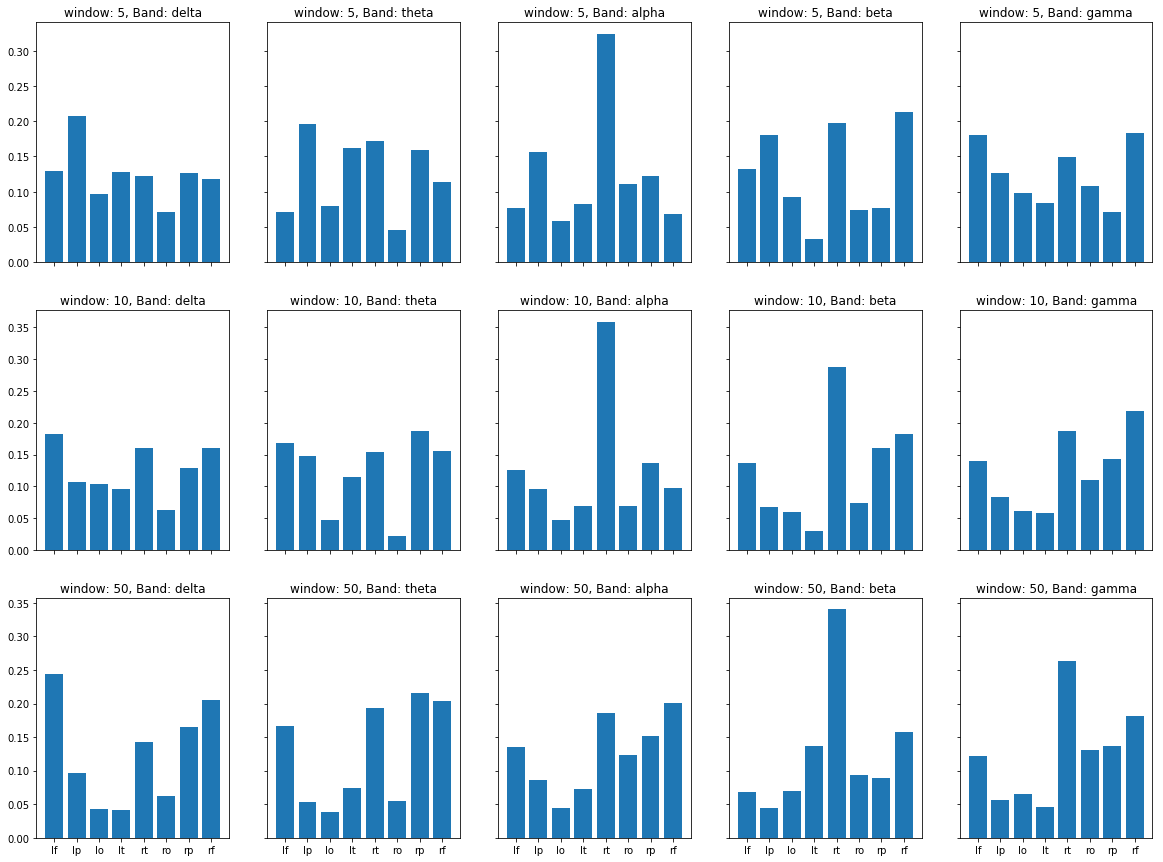

In [13]:
################ Use to determine band & time window parameters
from scipy import stats
for pat in centerloader.get_results():
    pat.compute_montage_groups()
    #print(pat.onsetwin, pat.onsetind, pat.samplerate)
    metadata = pat.get_metadata()
    print(metadata.keys())
    #print(pat.ch_groups['right-occipital'])
    print(metadata['samplerate'])
    break
    

patientloader = SubjectResultsLoader(subjid=allpats[4],
                            preload=True,
                            datatype='freq',
                            root_dir=resultsdir)    

FragNames = ['lf', 'lp', 'lo', 'lt', 'rt', 'ro', 'rp', 'rf']
 
times = [5, 10, 50]
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']
fig, ax = plt.subplots(len(times), len(bands), sharex='col', sharey='row', figsize = (20, 15))

for i in np.arange(len(times)):
    for j in np.arange(len(bands)):
        fDist = calcFreqDistribution(times[i], myband = bands[j])
        ax[i, j].bar(FragNames, fDist)
        #ax[i, j].set_ylim((0, 1))
        ax[i, j].set_title("window: " + str(times[i]) + ", Band: " + str(bands[j]))
    
#distance ks2 samp, kl_div

Already renamed seeg.xyz
Already renamed gain.mat
Found 6 jsonfilepaths for la04
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_1p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_2p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_3p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la04_scalp_sz_4p_freqmodel.npz')
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data

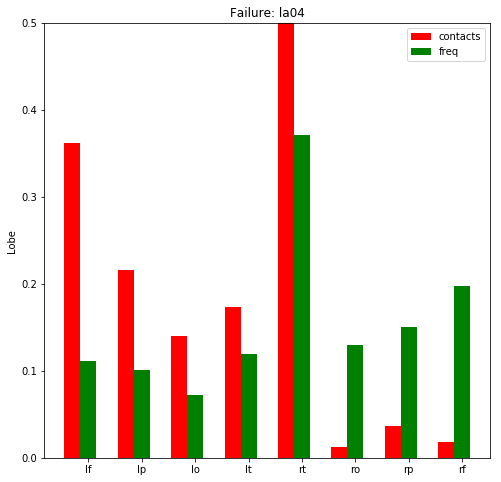

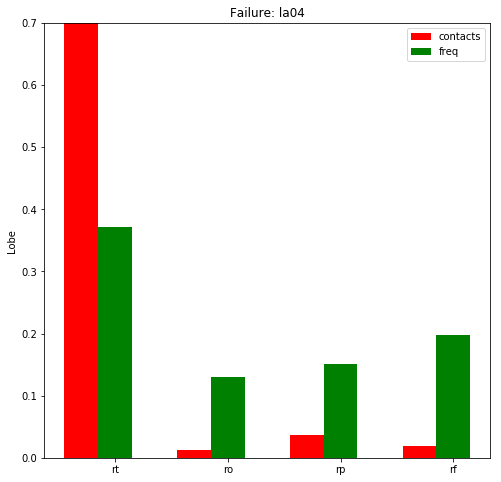

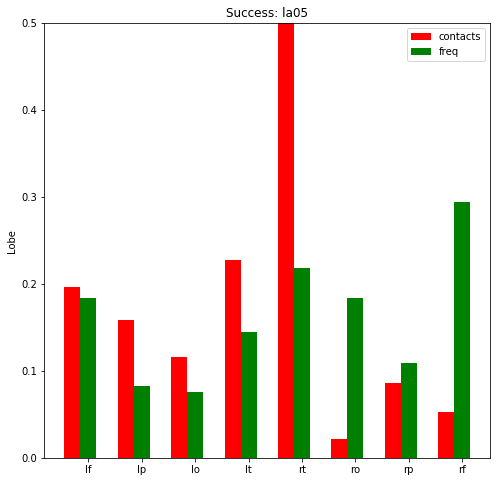

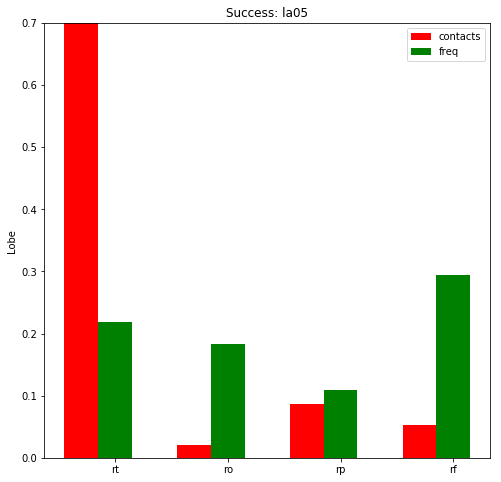

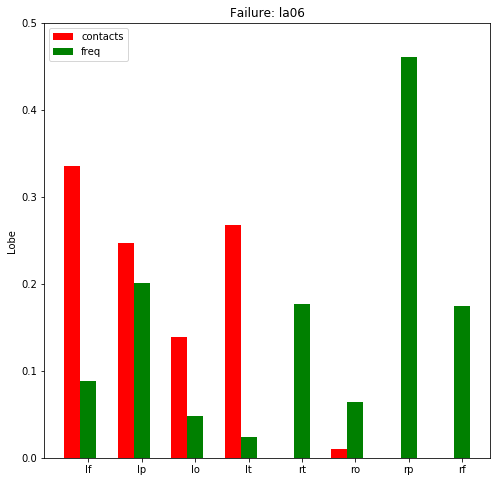

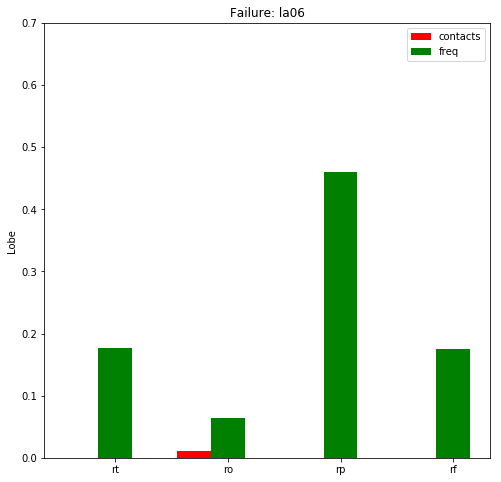

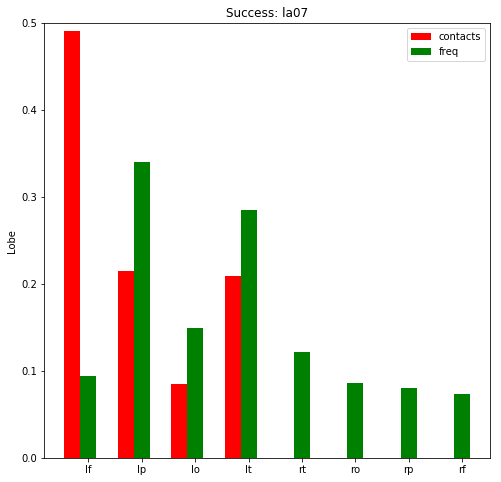

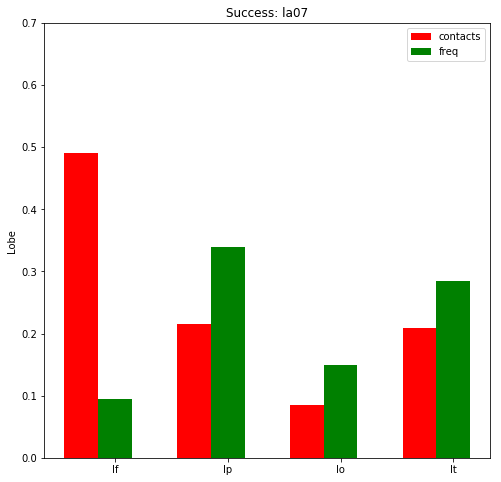

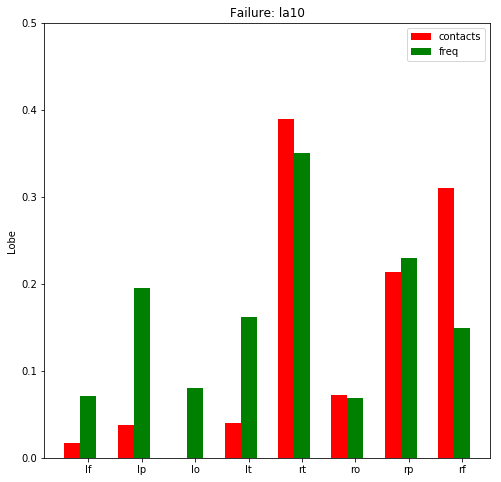

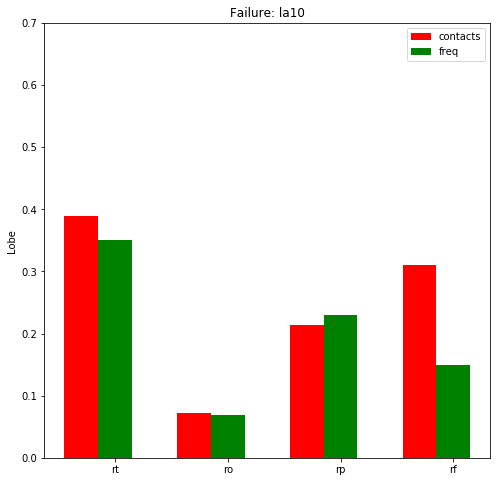

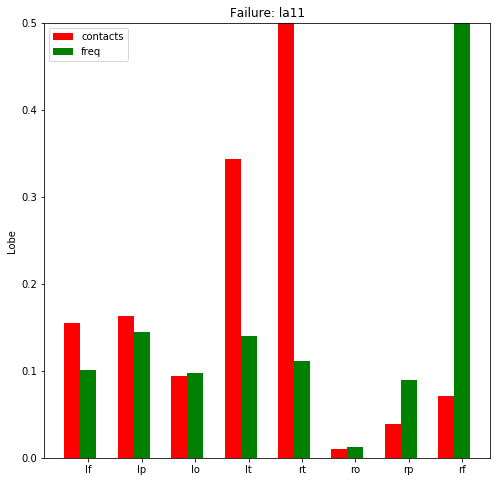

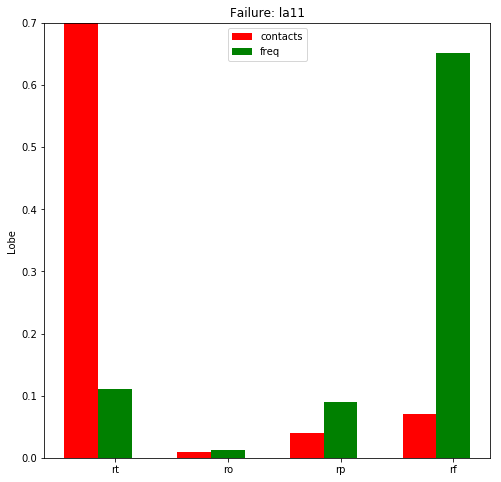

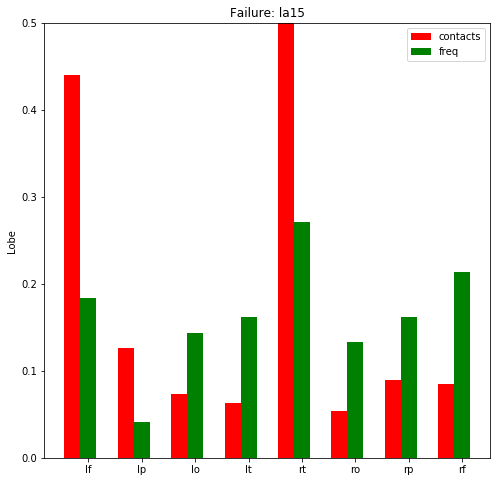

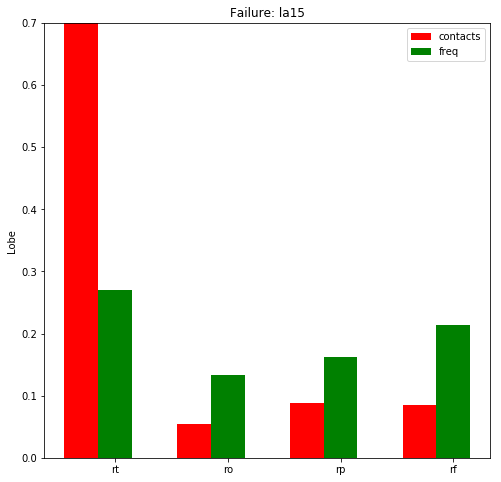

In [14]:
from scipy.spatial import distance
ks_2 = []
k1_div = []
euc = []
l1 = []
sqrtDist = []
success = []
mins = []
minsSqrd = []
for patInd in np.arange(len(allpats)):
    
    patientloader = SubjectResultsLoader(subjid=allpats[patInd],
                            preload=True,
                            datatype='freq',
                            root_dir=resultsdir);
    contactfile = '../../edp/utils/Results/' + allpats[patInd] + 'contactDistribution.npy'

    winSize = 5
    cDist = np.load(contactfile)
    fDist = calcFreqDistribution(winSize, myband = 'theta')
    FragNames = ['lf', 'lp', 'lo', 'lt', 'rt', 'ro', 'rp', 'rf']
    left = np.sum(fDist[:4]) > np.sum(fDist[3:])
    
    if (left):
        freqVals = fDist[:4]
        cVals = cDist[:4]
        FragNamesHalf = FragNames[:4]
    else:
        freqVals = fDist[4:]
        cVals = cDist[4:]
        FragNamesHalf = FragNames[4:]
    for i in np.arange(np.size(freqVals, 0)):
        freqVals[i] = freqVals[i]/(np.sum(freqVals))
    for i in cVals:
        cVals[i] = cVals[i]/(np.sum(cVals))
    
    N = 8      
    ind = np.arange(N)  # the x locations for the groups
    width = 0.3       # the width of the bars
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, cDist, width, color='r')
    rects2 = ax.bar(ind+width, fDist, width, color='g')
    ax.set_ylabel('Lobe')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(FragNames)
    ax.set_ylim((0, .5))
    ax.legend( (rects1[0], rects2[0]), ('contacts', 'freq') )
    if (patientloader.get_results()[0].get_metadata()['outcome'] == 's'):
        ax.set_title("Success: " + allpats[patInd])
    else:
        ax.set_title("Failure: " + allpats[patInd])
        
    
    M = 4      
    ind2 = np.arange(M)  # the x locations for the groups
    width2 = 0.3       # the width of the bars
    fig2 = plt.figure(figsize = (8,8))
    ax2 = fig2.add_subplot(111)
    rects3 = ax2.bar(ind2, cVals, width2, color='r')
    rects4 = ax2.bar(ind2+width2, freqVals, width2, color='g')
    ax2.set_ylabel('Lobe')
    ax2.set_xticks(ind2+width2)
    ax2.set_xticklabels(FragNamesHalf)
    ax2.set_ylim((0, .7))
    ax2.legend( (rects3[0], rects4[0]), ('contacts', 'freq') )
    if (patientloader.get_results()[0].get_metadata()['outcome'] == 's'):
        ax2.set_title("Success: " + allpats[patInd])
    else:
        ax2.set_title("Failure: " + allpats[patInd])
        
        

    #print("contact Distribution: " + str(cDist))
    #print("fragility Distribution: " + str(fDist))
    ks_2.append(stats.ks_2samp(cDist, fDist)[0])
    k1_div.append(stats.entropy(cDist,fDist))
    euc.append(distance.euclidean(cDist, fDist))
    l1.append(np.sum(np.abs(cDist - fDist)))
    mins.append(np.sum(np.minimum(cDist, fDist)))
    minsSqrd.append(np.sum(np.power(np.minimum(cDist, fDist), 2)))
    sqrtDist.append(np.sum(np.sqrt(np.abs(cDist-fDist))))
    success.append(patientloader.get_results()[0].get_metadata()['outcome'])

    #print("ks 2 sample: " + allpats[patInd] + " "+ str(stats.ks_2samp(cDist, fDist)))
    #print("kl divergence: " + allpats[patInd] + " " + str(stats.entropy(cDist, fDist)))
    #print("Euclidean Distance: " + allpats[patInd] + " "+ str(distance.euclidean(cDist, fDist)))

#plt.savefig

[u'f', u's', u'f', u's', u'f', u'f', u'f']
[0.6758631109583052, 0.6946177592838892, 0.6386818373912582, 0.4662869886804696, 0.2775006787335338, 0.9873653684696447, 0.5890297197337839]
[1.4565619596321364, 1.2564661046072034, 1.4946062923790646, 1.0250681147842107, 0.63496531988830363, 1.6805875887997939, 1.2704933724084841]
[3.1810058530905305, 2.7061054643371141, 3.2576778608078585, 2.711694893525169, 2.0511892498426585, 2.7912039877902499, 2.9776190454638156]
[0.84396406651031808, 0.86519360538634071, 0.37134851941387764, 0.602965348931227, 0.87588173226039878, 0.71121345978071138, 0.86046732934125103]


Text(0.5,1,'Total squared intersection for each patient for all 8 lobes')

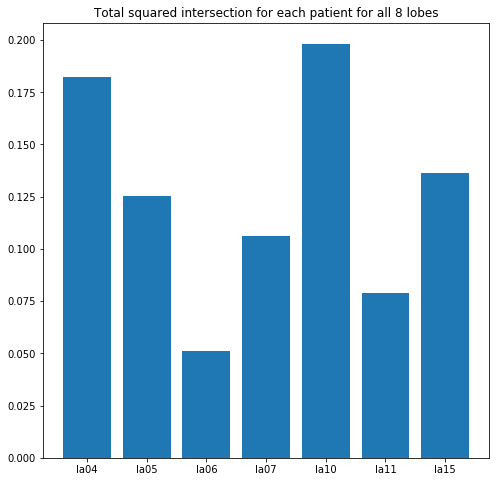

In [15]:
print(success)
print(euc)
print(l1)
print(sqrtDist)
print(mins)

plt.figure(figsize = (8,8))
plt.bar(allpats, minsSqrd)
plt.title("Total squared intersection for each patient for all 8 lobes")

# 3. Quick and Dirty Visualization

Already renamed seeg.xyz
Already renamed gain.mat
Found 1 jsonfilepaths for la07
('Loading results data from: ', u'D:\\Documents\\Hopkins\\Research\\NeuromedicalControlSystemsLab\\IntersessionProject\\eztrackv2\\edp\\utils\\Data\\cleveland\\la07_scalp_sz_1p_freqmodel.npz')


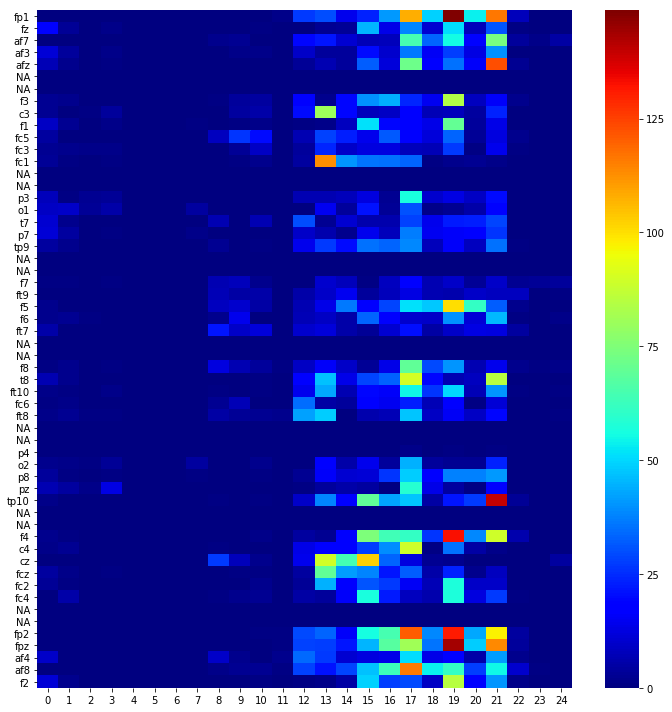

In [16]:
patientloader = SubjectResultsLoader(subjid=allpats[3],
                            preload=True,
                            datatype='freq',
                            root_dir=resultsdir)    

windowSize = 5
for pat in patientloader.get_results():
    pat.compute_montage_groups()
    
    #freqmat2 = np.median(np.power(10, getBand(pat.get_data(), 'theta', freqs = pat.get_metadata()['freqs'])), 1)
    #freqmat = np.copy(freqmat2)
    #for i in np.arange(np.size(freqmat, )):
        #freqmat[i, :] = (freqmat[i, :] - np.mean(freqmat[i, :])) / np.std(freqmat[:, i])
    #freqmat = np.power(freqmat, 2)
    #freqmat[freqmat < .2] = .000001
    chanlabels = np.array(pat.chanlabels)
    onset = pat.get_metadata()['onsetwin']
    start = onset - windowSize
    stop = onset+ 4* windowSize
    a, b, freqmat = calcLobeFreq(pat, start, stop, band1 = 'theta')
    ro = freqmat[pat.ch_groups['right-occipital'], start:stop]
    lo = freqmat[pat.ch_groups['left-occipital'], start:stop]
    rf = freqmat[pat.ch_groups['right-frontal'], start:stop]
    lf = freqmat[pat.ch_groups['left-frontal'],  start:stop]
    rp = freqmat[pat.ch_groups['right-parietal'],  start:stop]
    lp = freqmat[pat.ch_groups['left-parietal'],  start:stop]
    rt = freqmat[pat.ch_groups['right-temporal'], start:stop]
    lt = freqmat[pat.ch_groups['left-temporal'], start:stop]
    labRO = chanlabels[pat.ch_groups['right-occipital']]
    labLO = chanlabels[pat.ch_groups['left-occipital']]
    labRF = chanlabels[pat.ch_groups['right-frontal']]
    labLF = chanlabels[pat.ch_groups['left-frontal']]
    labRP = chanlabels[pat.ch_groups['right-parietal']]
    labLP = chanlabels[pat.ch_groups['left-parietal']]
    labRT = chanlabels[pat.ch_groups['right-temporal']]
    labLT = chanlabels[pat.ch_groups['left-temporal']]
    z = np.zeros(np.size(ro, 1))
    zeroLab = np.array(['NA'])
    newFrag = np.vstack((lf,z, z, lp,z, z, lo,z, z, lt,z, z, rt,z, z, ro,z, z, rp,z, z, rf))
    newLab = np.concatenate((labLF,zeroLab, zeroLab, labLP,zeroLab, zeroLab, labLO,zeroLab, zeroLab, labLT,zeroLab, zeroLab, labRT,zeroLab, zeroLab, labRO,zeroLab, zeroLab, labRP,zeroLab, zeroLab, labRF), axis = 0)
    
    
#     print(fragmat.shape, len(pat.chanlabels))
    fig, ax = plt.subplots(1,1, figsize=(10, 10))
    sns.heatmap(newFrag, cmap='jet', yticklabels=newLab)
    fig.tight_layout()